In [131]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,40,34000
1,49,40000
2,50,46000
3,40,33500
4,49,40000


In [133]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["area"]], df[["price"]])

LinearRegression()

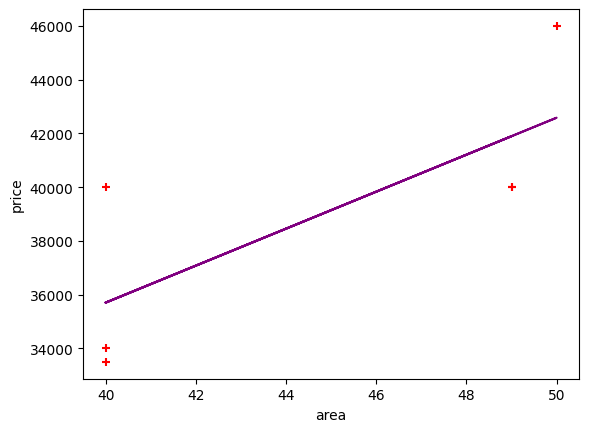

In [134]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[["area"]]),color="purple")

In [135]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,40
1,49
2,50
3,40
4,49
5,40


In [136]:
price = df.price
price

0    34000
1    40000
2    46000
3    33500
4    40000
5    40000
Name: price, dtype: int64

In [137]:
reg.predict(pd.DataFrame([[3300]], columns=["area"]))

array([[2277991.11675127]])

In [138]:
reg.coef_

array([[687.81725888]])

In [139]:
reg.intercept_

array([8194.16243655])

In [140]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [141]:
reg.predict(pd.DataFrame([[3300]], columns=["area"]))

array([[2277991.11675127]])

In [142]:
d = pd.read_csv("areas.csv")
d.head(3)

,area
0,30
1,35
2,43


In [143]:
p = reg.predict(d)
p

array([[28828.68020305],
       [32267.76649746],
       [37770.30456853],
       [40521.57360406],
       [42585.02538071],
       [56341.37055838]])

In [144]:
d['prices']=p
d

,area,prices
0,30,28828.680203
1,35,32267.766497
2,43,37770.304569
3,47,40521.573604
4,50,42585.025381
5,70,56341.370558


In [145]:
d.to_csv("prediction.csv")

In [146]:
import pickle

In [147]:
with open("model_pickle", "wb") as f:
    pickle.dump(reg,f)

In [148]:
with open("model_pickle", "rb") as f:
    reg = pickle.load(f) 

In [149]:
reg.predict([[5000]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3447280.45685279]])

In [150]:
import joblib

In [151]:
joblib.dump(reg, "model_joblib")

['model_joblib']

In [152]:
mj = joblib.load("model_joblib")

In [153]:
mj.coef_

array([[687.81725888]])

In [154]:
mj.intercept_
mj.predict([[5000]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3447280.45685279]])